In [18]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import umap
%matplotlib inline
datafile = 'dataset4.tpm.txt'
df = pd.read_csv(datafile, sep='\t')

In [19]:
df = df.set_index('gene_name')
cells = list(df.columns.values)

In [20]:
mat = np.array(df)
per_cell_sum = mat.sum(axis=1)
per_gene_sum = mat.sum(axis=0)
low_expr_thr = 5000
high_expr_thr = 80000000
mat = mat[:, (per_gene_sum>=low_expr_thr) & (per_gene_sum<=high_expr_thr)]
mean_exp = mat.mean(axis=0)
std_exp = np.sqrt(mat.std(axis=0))
CV = std_exp/mean_exp
mat = mat[:, CV >= 0.6]
cells_expression = mat.sum(axis=1)
mat = mat[cells_expression>=100, :]
mat = np.log(mat+1)
df = pd.DataFrame(mat,index=mat[:,0])

In [21]:
def dendrogrammer(df, leaf_labels):
    D = df.values
    if len(leaf_labels) != len(D):
        D = np.transpose(D)
    Z = linkage(D, method='ward', metric='euclidean')
    plt.figure(figsize=(10, 10))
    ax = plt.subplot()
    plt.subplots_adjust(left=0.07, bottom = 0.3, right = 0.98, top = 0.95, wspace=0, hspace=0)
    plt.xlabel('Cell Line')
    plt.ylabel('Distance')
    
    dendrogram(Z, leaf_rotation=90., leaf_font_size=10., labels = leaf_labels)
    plt.savefig('dataset4dend.png')

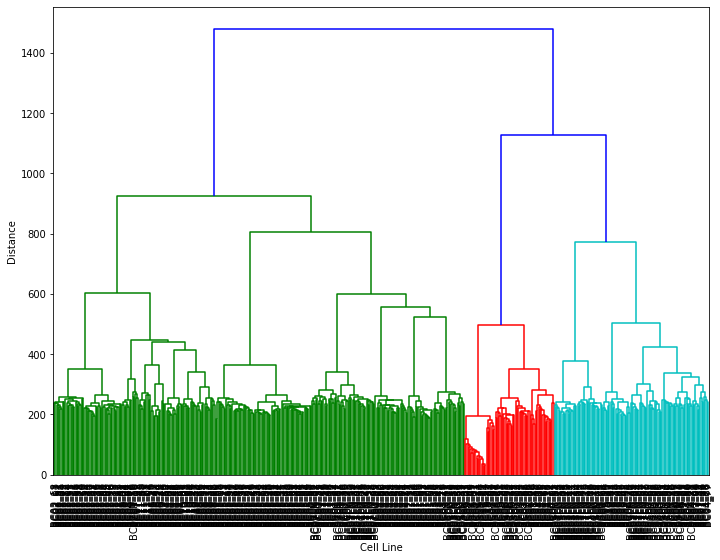

In [7]:

dendrogrammer(df, cells)

In [22]:
def PCAer(df):
 D = df.values
 D = np.transpose(D)
 pca = PCA(n_components= 90)
 pca.fit(D)
 projected = pca.fit_transform(D)
 return projected

In [23]:
from sklearn.cluster import KMeans
Dpc = PCAer(df)
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(Dpc)
labels = kmeans.predict(Dpc)
C = kmeans.cluster_centers_
out = [Dpc, labels, C]
print(np.bincount(kmeans.labels_))
'''def kmeanser(df, k): 
    Dpc = PCAer(df)
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Dpc)
    labels = kmeans.predict(Dpc)
    C = kmeans.cluster_centers_
    out = [Dpc, labels, C]
    print(np.bincount(kmeans.labels_))
    return out'''

[197  76  76 169]


'def kmeanser(df, k): \n    Dpc = PCAer(df)\n    kmeans = KMeans(n_clusters=k)\n    kmeans = kmeans.fit(Dpc)\n    labels = kmeans.predict(Dpc)\n    C = kmeans.cluster_centers_\n    out = [Dpc, labels, C]\n    print(np.bincount(kmeans.labels_))\n    return out'

In [24]:
[proj, labels, centroids] = out

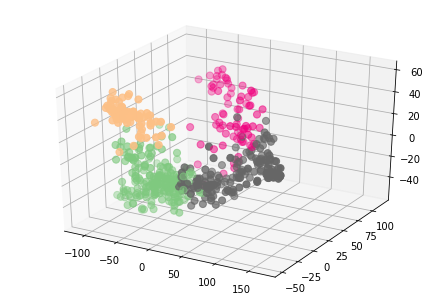

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1 = Axes3D(fig1)

ax1.scatter(proj[:,0], proj[:, 1], proj[:, 2], c=labels, s=50, cmap='Accent')

ax1.scatter(centroids[:,0], centroids[:, 1], centroids[:,2], c = 'white', s=100, marker='*', cmap='Accent')
plt.savefig('3ddataset4.png')

In [27]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

def ClusterIndicesComp(clustNum, labels_array): #list comprehension
    return np.array([i for i, x in enumerate(labels_array) if x == clustNum])

def DataCollection(algorithm, cluster_1, cluster_2, cluster_3, cluster_4, results):
    num1 = ClusterIndicesNumpy(0, algorithm.labels_)
    num2 = ClusterIndicesNumpy(1, algorithm.labels_)
    num3 = ClusterIndicesNumpy(2, algorithm.labels_)
    num4 = ClusterIndicesNumpy(3, algorithm.labels_)
    barcodes1 = []
    barcodes2 = []
    barcodes3 = []
    barcodes4 = []
    for i in num1:
        barcodes1.append(cells[i])
    for i in num2:
        barcodes2.append(cells[i])
    for i in num3:
        barcodes3.append(cells[i])
    for i in num4:
        barcodes4.append(cells[i])
    with open(cluster_1, 'w') as filehandle:
        for listitem in barcodes1:
            filehandle.write('%s\n' % listitem)
    with open(cluster_2, 'w') as filehandle:
        for listitem in barcodes2:
            filehandle.write('%s\n' % listitem)
    with open(cluster_3, 'w') as filehandle:
        for listitem in barcodes3:
            filehandle.write('%s\n' % listitem)
    with open(cluster_4, 'w') as filehandle:
        for listitem in barcodes4:
            filehandle.write('%s\n' % listitem)
        
        
    dp = open('results/DPCells.txt').readlines()
    dp_line = []
    for lines in dp:
        dp_line.append(lines)
    erp = open('results/ERPCells.txt').readlines()
    erp_line = []
    for lines in erp:
        erp_line.append(lines)
    her2p = open('results/HER2PCells.txt').readlines()
    her2p_line = []
    for lines in her2p:
        her2p_line.append(lines)
        
    tnbc = open('results/TNBCCells.txt').readlines()
    tnbc_line = []
    for lines in tnbc:
        tnbc_line.append(lines)
        
    res = open(results, "w")

    dpcount = 0
    erpcount = 0
    her2pcount = 0
    tnbccount = 0

    dpcount2 = 0
    erpcount2 = 0
    her2pcount2 = 0
    tnbccount2 = 0
    
    dpcount3 = 0
    erpcount3 = 0
    her2pcount3 = 0
    tnbccount3 = 0
    
    dpcount4 = 0
    erpcount4 = 0
    her2pcount4 = 0
    tnbccount4 = 0

    
    cluster1 = open(cluster_1).readlines()
    cluster1_line = []
    for lines in cluster1:
        cluster1_line.append(lines)
    for i in cluster1_line:
        for j in dp_line:
            if i == j:
                dpcount = dpcount + 1
    res.write("DP Count Cluster 1: \n")
    res.write(str(dpcount/(len(cluster1_line))) + " \n")
    res.write(str(dpcount) + " \n")
    for i in cluster1_line:
        for j in erp_line:
            if i == j:
                erpcount = erpcount + 1
    res.write("ERP Count Cluster 1: \n")
    res.write(str(erpcount/(len(cluster1_line))) + "\n")
    res.write(str(erpcount) + "\n")
    for i in cluster1_line:
        for j in her2p_line:
            if i == j:
                her2pcount = her2pcount + 1
    res.write("HER2P Count Cluster 1: \n")
    res.write(str(her2pcount/(len(cluster1_line))) + "\n")
    res.write(str(her2pcount) + "\n")
    for i in cluster1_line:
        for j in tnbc_line:
            if i == j:
                tnbccount = tnbccount + 1
    res.write("TNBC Count Cluster 1: \n")
    res.write(str(tnbccount/(len(cluster1_line))) + "\n")
    res.write(str(tnbccount) + "\n")
    res.write("\n")
    

    cluster2 = open(cluster_2).readlines()
    cluster2_line = []
    for lines in cluster2:
        cluster2_line.append(lines)
    for i in cluster2_line:
        for j in dp_line:
            if i == j:
                dpcount2 = dpcount2 + 1
    res.write("DP Count Cluster 2:" + "\n")
    res.write(str(dpcount2/(len(cluster2_line))) + "\n")
    res.write(str(dpcount2) + "\n")
    for i in cluster2_line:
        for j in erp_line:
            if i == j:
                erpcount2 = erpcount2 + 1
    res.write("ERP Count Cluster 2:" + "\n")
    res.write(str(erpcount2/(len(cluster2_line))) + "\n")
    res.write(str(erpcount2) + "\n")
    for i in cluster2_line:
        for j in her2p_line:
            if i == j:
                her2pcount2 = her2pcount2 + 1
    res.write("HER2P Count Cluster 2: \n")
    res.write(str(her2pcount2/(len(cluster2_line))) + "\n")
    res.write(str(her2pcount2) + "\n")
    for i in cluster2_line:
        for j in tnbc_line:
            if i == j:
                tnbccount2 = tnbccount2 + 1
    res.write("TNBC Count Cluster 2: \n")
    res.write(str(tnbccount2/(len(cluster2_line))) + "\n")
    res.write(str(tnbccount2) + "\n")
    res.write("\n")
    

    cluster3 = open(cluster_3).readlines()
    cluster3_line = []
    for lines in cluster3:
        cluster3_line.append(lines)
    for i in cluster3_line:
        for j in dp_line:
            if i == j:
                dpcount3 = dpcount3 + 1
    res.write("DP Count Cluster 3:" + "\n")
    res.write(str(dpcount3/(len(cluster3_line))) + "\n")
    res.write(str(dpcount3) + "\n")
    for i in cluster3_line:
        for j in erp_line:
            if i == j:
                erpcount3 = erpcount3 + 1
    res.write("ERP Count Cluster 3:" + "\n")
    res.write(str(erpcount3/(len(cluster3_line))) + "\n")
    res.write(str(erpcount3) + "\n")
    for i in cluster3_line:
        for j in her2p_line:
            if i == j:
                her2pcount3 = her2pcount3 + 1
    res.write("HER2P Count Cluster 3:" + "\n")
    res.write(str(her2pcount3/(len(cluster3_line))) + "\n")
    res.write(str(her2pcount3) + "\n")
    for i in cluster3_line:
        for j in tnbc_line:
            if i == j:
                tnbccount3 = tnbccount3 + 1
    res.write("TNBC Count Cluster 3:" + "\n")
    res.write(str(tnbccount3/(len(cluster3_line))) + "\n")
    res.write(str(tnbccount3) + "\n")
    res.write("\n")
    
    cluster4 = open(cluster_4).readlines()
    cluster4_line = []
    for lines in cluster4:
        cluster4_line.append(lines)
    for i in cluster4_line:
        for j in dp_line:
            if i == j:
                dpcount4 = dpcount4 + 1
    res.write("DP Count Cluster 4:" + "\n")
    res.write(str(dpcount4/(len(cluster4_line))) + "\n")
    res.write(str(dpcount4) + "\n")
    for i in cluster4_line:
        for j in erp_line:
            if i == j:
                erpcount4 = erpcount4 + 1
    res.write("ERP Count Cluster 4:" + "\n")
    res.write(str(erpcount4/(len(cluster4_line))) + "\n")
    res.write(str(erpcount4) + "\n")
    for i in cluster4_line:
        for j in her2p_line:
            if i == j:
                her2pcount4 = her2pcount4 + 1
    res.write("HER2P Count Cluster 4:" + "\n")
    res.write(str(her2pcount4/(len(cluster4_line))) + "\n")
    res.write(str(her2pcount4) + "\n")
    for i in cluster4_line:
        for j in tnbc_line:
            if i == j:
                tnbccount4 = tnbccount4 + 1
    res.write("TNBC Count Cluster 4:" + "\n")
    res.write(str(tnbccount4/(len(cluster4_line))) + "\n")
    res.write(str(tnbccount4) + "\n")
    res.write("\n")

DataCollection(kmeans, "4kmeans_cluster1.txt", "4kmeans_cluster2.txt", "4kmeans_cluster3.txt", "4kmeans_cluster4.txt", "4kmeans_results.txt")

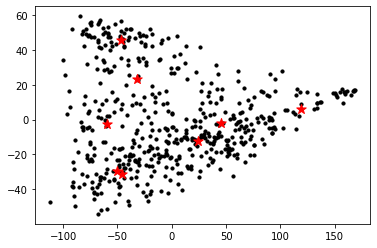

In [30]:
plt.scatter(proj[:,0], proj[:,2], s=10.0, color='black')
plt.scatter(centroids[:,0], centroids[:, 2], c = 'red', s = 100, marker='*', cmap='Accent')

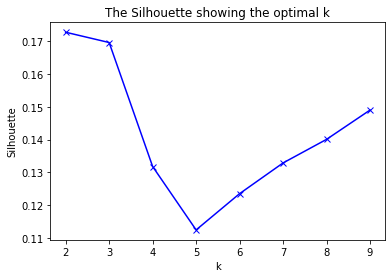

In [31]:
from sklearn.metrics import silhouette_score
K = range(2, 10)
sil = []
Dpc = PCAer(df)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Dpc)
    labels = kmeans.predict(Dpc)
    sil.append(silhouette_score(Dpc, labels))
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('The Silhouette showing the optimal k')
plt.show()

In [12]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis = 1))/df.shape[0])

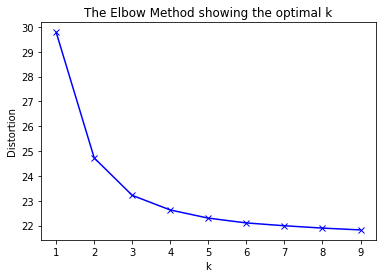

In [14]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('elbow4.png')
plt.show()
